In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/peoples.jpg


In [2]:
# !pip install imutils
# !pip install dlib

^C
ERROR: Operation cancelled by user
     |████████████████████████████████| 3.4MB 4.7MB/s eta 0:00:01
anceled
ERROR: Operation cancelled by user


In [3]:
!pip install face_recognition

  Using cached https://files.pythonhosted.org/packages/05/57/e8a8caa3c89a27f80bc78da39c423e2553f482a3705adc619176a3a24b36/dlib-19.17.0.tar.gz
     |████████████████████████████████| 100.2MB 403kB/s  eta 0:00:01
  Created wheel for dlib: filename=dlib-19.17.0-cp36-cp36m-linux_x86_64.whl size=3801362 sha256=aafb667b3ab6d9e76e0dbc45b8cf31b1aac80f58a2dedfaf6ce6bc8e4f2fffb2
  Stored in directory: /tmp/.cache/pip/wheels/50/b6/b5/5f46aacfd18028ff57591cfb53fcc7554362977c15e9060e67
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566174 sha256=f644be113f5221bdce981f38c1dc08d643f3d4c205c3da09140e8eb248aa20a7
  Stored in directory: /tmp/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built dlib face-recognition-models


In [15]:
from PIL import Image
import face_recognition
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Load the jpg file into a numpy array
image = face_recognition.load_image_file("/kaggle/input/peoples.jpg")

In [8]:
face_locations = face_recognition.face_locations(image)
face_locations

[(408, 408, 563, 253),
 (526, 1687, 655, 1558),
 (167, 1268, 322, 1113),
 (311, 655, 440, 526),
 (442, 992, 597, 838),
 (225, 411, 354, 282),
 (325, 798, 454, 669),
 (133, 752, 288, 597),
 (411, 554, 540, 425),
 (483, 1400, 612, 1271),
 (184, 1594, 339, 1440),
 (497, 1171, 626, 1042),
 (268, 1070, 397, 941)]

In [24]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, optional, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (`sharex`) or y (`sharey`)
        axes:
    
            - True or 'all': x- or y-axis will be shared among all
              subplots.
            - False or 'none': each subplot x- or y-axis will be
              independent.
            - 'row': each subplot row will share an x- or y-axis.
            - 'col': each subplot column will share an x- or y-axis.
    
        Wh

I found 13 face(s) in this photograph.
A face is located at pixel location Top: 408, Left: 253, Bottom: 563, Right: 408
(155, 155, 3)
A face is located at pixel location Top: 526, Left: 1558, Bottom: 655, Right: 1687
(129, 129, 3)
A face is located at pixel location Top: 167, Left: 1113, Bottom: 322, Right: 1268
(155, 155, 3)
A face is located at pixel location Top: 311, Left: 526, Bottom: 440, Right: 655
(129, 129, 3)
A face is located at pixel location Top: 442, Left: 838, Bottom: 597, Right: 992
(155, 154, 3)
A face is located at pixel location Top: 225, Left: 282, Bottom: 354, Right: 411
(129, 129, 3)
A face is located at pixel location Top: 325, Left: 669, Bottom: 454, Right: 798
(129, 129, 3)
A face is located at pixel location Top: 133, Left: 597, Bottom: 288, Right: 752
(155, 155, 3)
A face is located at pixel location Top: 411, Left: 425, Bottom: 540, Right: 554
(129, 129, 3)
A face is located at pixel location Top: 483, Left: 1271, Bottom: 612, Right: 1400
(129, 129, 3)
A fac

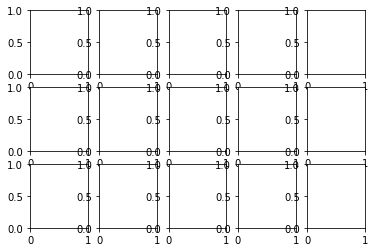

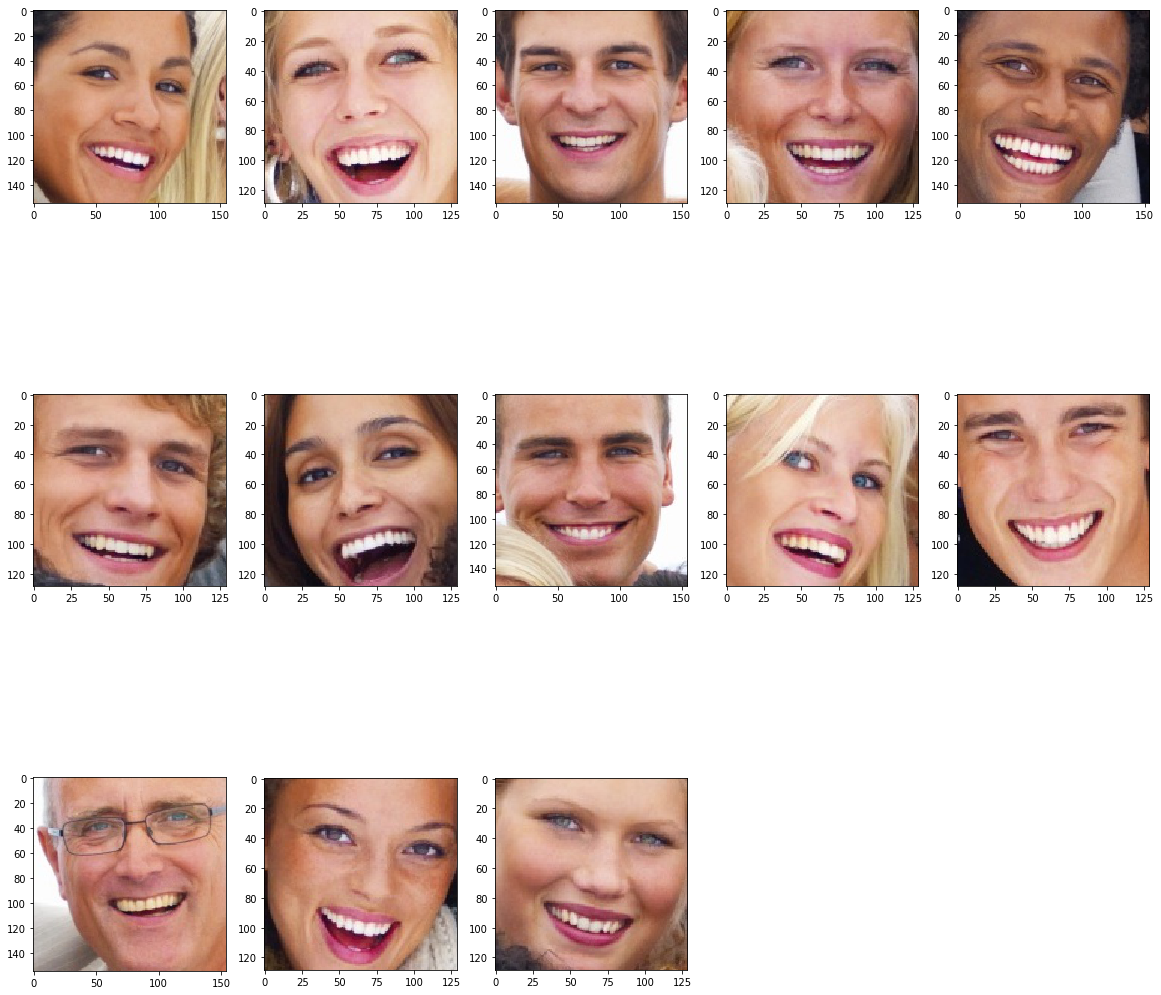

In [27]:
print("I found {} face(s) in this photograph.".format(len(face_locations)))
plt.subplots(3, 5)
plt.figure(figsize=(20, 20))
i = 1
for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    print(face_image.shape)
#     pil_image = Image.fromarray(face_image)
    plt.subplot(3, 5, i)
    i += 1
    plt.imshow(face_image)